# Algoritma Klasifikasi Naive Bayes


**Pembuka**

Assalamu'alaikum warahmatullahi wabarakatuh. Puji syukur kehadirat Allah Subhana Wata'ala atas limpahan
Rahmat dan HidayahNya kepada kita semua. Sholawat serta salam senantiasa tercurah limpahkan kepada
baginda Muhammad Rasulullah Salallahualaihiwassalam.

Halo para **Pejuang Data**. Selamat berjumpa di pertemuan keenam Program Training **Algoritma Machine**
Learning Kelas Mahir.

Pada pertemuan ini kamu akan belajar:

- Algoritma Naive Bayes
- Contoh Perhitungan Manual Algoritma Naive Bayes
- Naive Bayes Python From Scratch

**Import Modul**




In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")


**Model Klasifikasi Naive Bayes**

Model klasifikasi Naive Bayes merupakan model klasifikasi dengan dasar gagasan Teorema Bayes dengan
asumsi semua variabel prediktornya(X) adalah saling independen. Model Naive Bayes mudah untuk dibangun.
Model ini tidak memiliki estimasi parameter iteratif yang kompleks yang membuatnya cocok untuk data yanng
sangat besar. Terlepas dari kesederhanaannya, model klasifikasi inisering kali bekerja dengan sangat baik dan
banyak digunakan karena sering mengungguli metode klasifikasi yang lebih canggih. Contohnya pada
klasifikasi sentimen pada dataset teks, klasifikasi email spam, dan klasifikasi dokumen.

**Algoritma Naive Bayes**

Teorema Bayes menyajikan cara untuk menghitung probabilitas bersyarat(posterior) . 𝑃(𝑌 = 𝑦|𝑋 =x1,x2,..,xn)dari 𝑃(𝑌 = 𝑦),𝑃(𝑋 = (𝑥1,x2,...,xn)
𝑃(𝑋 = (𝑥1,x2,...,xn)|𝑌 = 𝑦)

Model klasifikasi Naive Bayes mengasumsikan bahwa pengaruh suatu
variabel prediktor pada kelas tertentu tidak bergantung pada nilai-nilai prediktor lainnya. Asumsi ini disebut
sebagai **class conditional independence.**
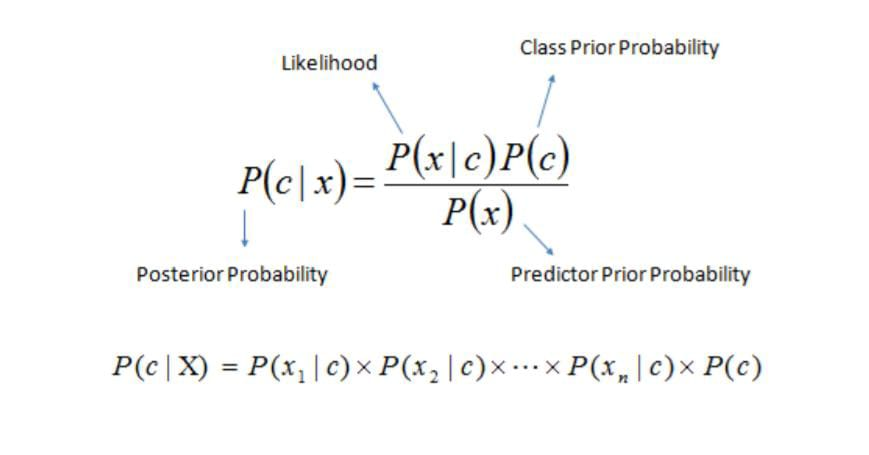



- ***P(Y|X)***  adalah probabilitas bersyarat(posterior) dari kelas(target) dengan suatu prediktor yang
diketahui(attribut).

- ***P(Y)*** adalah probabilitas prior dari kelas.

- ***P(X|Y)*** adalah likelihood yang merupakan probabilitas prediktor dengan kelas yang diketahui.

- ***P(X)*** adalah probabilitas prior dari prediktor(atribut)

**Penghitungan Manual Metode Klasifikasi Naive Bayes Data
Categorical**

Misal kita memiliki dataset sebagai berikut




In [36]:
df = pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
 'x_2':[0,1,2,0,2,1,2,0,1,0],
 'y':[0,1,1,1,0,0,1,0,0,0]})
df

,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


Misal kita akan menghitung 𝑃(𝑌 = 0|𝑋 = (0, 2)) dan 𝑃(𝑌 = 1|𝑋 = (0, 2))

Langkah-langkahnya adalah sebagai berikut:

1. Menghitung probabilitas prior
2. Menghitung probabilitas likelihood
3. Mengalikan probabilitas likelihood dan probabilitas prior

Berikut contohnya:

1. Menghitung probabilitas prior

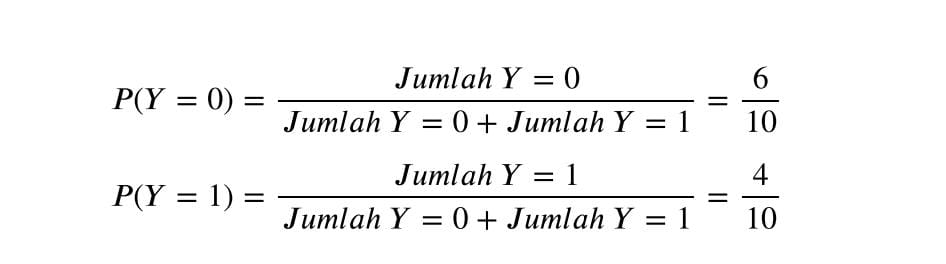

2. Menghitung probabilitas likelihood

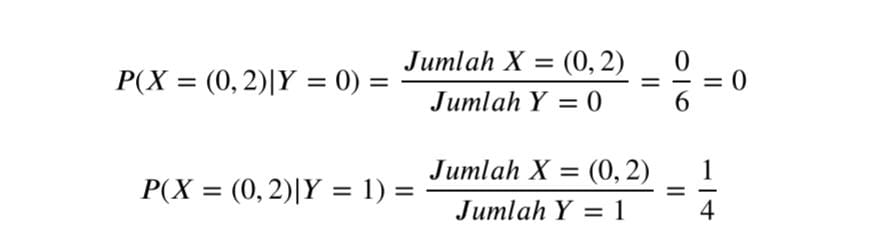




cara lain adalah dengan menggunakan teorema bayes:

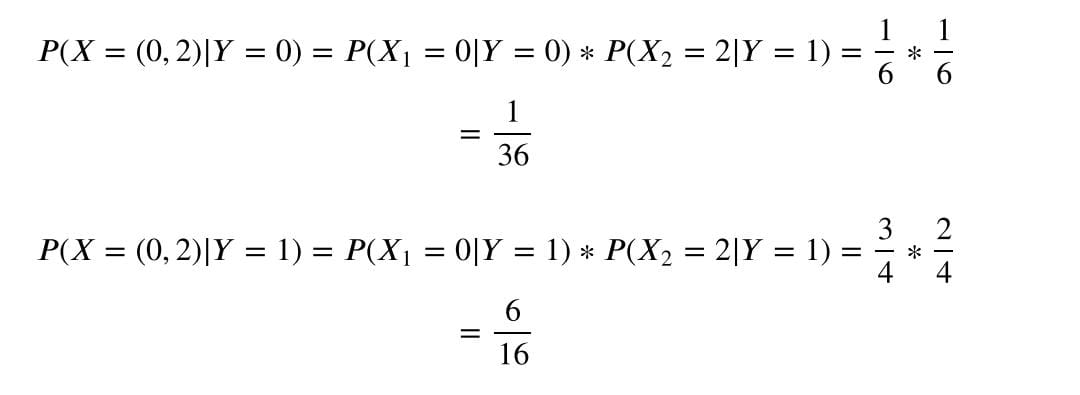

3. Mengalikan probabilitas likelihood dan probabilitas prior
 
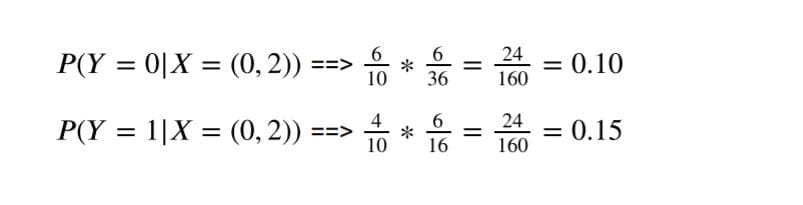


Dari hasil terakhir di atas diperoleh bahwa probabilitas muncul kelas y=1 dengan syarat x=(0,2) adalah yg lebih
tinggi maka untuk input x=(0,2) hasil klasifikasinya adalah y=1



**Implementasi Pada Python**

Import Library

In [37]:
import pandas as pd
import numpy as np


DataFrame Input

In [38]:
df = pd.DataFrame({'x_1':[0,0,1,0,2,1,0,2,2,1],
 'x_2':[0,1,2,0,2,1,2,0,1,0],
 'y':[0,1,1,1,0,0,1,0,0,0]})
df


,x_1,x_2,y
0,0,0,0
1,0,1,1
2,1,2,1
3,0,0,1
4,2,2,0
5,1,1,0
6,0,2,1
7,2,0,0
8,2,1,0
9,1,0,0


Naive Bayes untuk Data Categorical


In [39]:
def prob_prior(df, Y):
  label_kelas = sorted(list(df[Y].unique()))
  prior = []
  for i in label_kelas:
      prior.append(len(df[df[Y]==i])/len(df))
  return prior

In [40]:
def likelihood_categorical(df, nama_var, nilai_var, Y, label):
 feat = list(df.columns)
 df = df[df[Y]==label]
 p_x_dgsyrt_y = len(df[df[nama_var]==nilai_var]) / len(df)
 return p_x_dgsyrt_y


In [41]:
def naive_bayes_categorical(df, X, Y):
    # mengambil nama kolom
    nama_kolom = list(df.columns)[:-1]
    # menghitung prob prior
    prior = prob_prior(df, Y)
    Y_pred = []
    # lopping pada setiap baris data
    for x in X:
        # menghitung likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
          for i in range(len(nama_kolom)):
              likelihood[j] *= likelihood_categorical(df, nama_kolom[i], x[i], Y, labels[j])
        # menghitung posterior probability
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [42]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values
Y_pred = naive_bayes_categorical(df, X=X, Y="y")

In [43]:
X

array([[0, 0],
       [0, 1],
       [1, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [0, 2],
       [2, 0],
       [2, 1],
       [1, 0]])

In [44]:
Y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 0, 0])

In [45]:
Y

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0])

**Implementasi Pada Data Real**

**Loading Dataset**


In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [47]:
dataset=pd.read_csv("https://raw.githubusercontent.com/sintia123445/possum/main/possum%20(1).csv")
#Melihat ukuran dataset
print(dataset.shape)
#Menampilkan 5 data teratas
dataset.head(5)

(104, 8)


,site,pop,sex,age,head_l,skull_w,total_l,tail_l
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0


**Membagi Data jadi Training & Testing**

In [48]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=.3, random_state=41)

NameError: ignored

**Training Model**

In [49]:
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_categorical(train, X=X_test, Y="diagnosis")


NameError: ignored

In [50]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test, Y_pred))

NameError: ignored

**Metode Klasifikasi Naive Bayes Data Numerik**

Misal kita memiliki dataset sebagai berikut:

In [51]:
from sklearn import datasets
import pandas as pd 

data = pd.read_csv("https://raw.githubusercontent.com/Suji04/ML_from_Scratch/master/Breast_cancer_data.csv")
data.head(3)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


Jika kita akan menghitung data numerik, maka ada dua cara, pertama kita ubah ke data categorical, atau
dengan pendekatan model distribusi. Artinya kita melakukan fitting data ke sebuah distribusi standar(misal
distribusi normal).

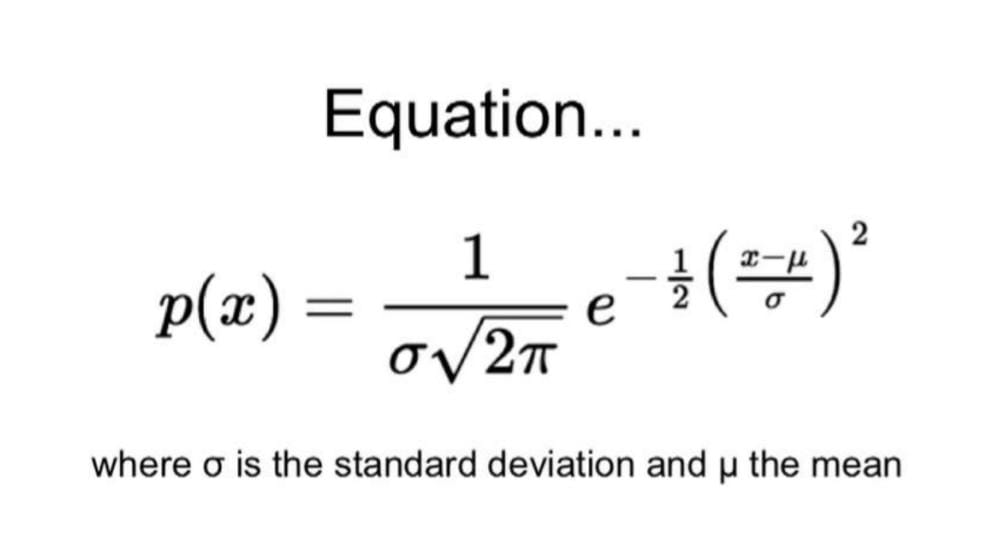

**Implementasi Pada Python**

**Import Library**

In [52]:
import pandas as pd
import numpy as np


DataFrame Input

In [53]:
data = pd.read_csv("https://raw.githubusercontent.com/Suji04/ML_from_Scratch/master/Breast_cancer_data.csv")
data.head(3)


,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.8,1001.0,0.11840,0
1,20.57,17.77,132.9,1326.0,0.08474,0
2,19.69,21.25,130.0,1203.0,0.10960,0


EDA for Distribution

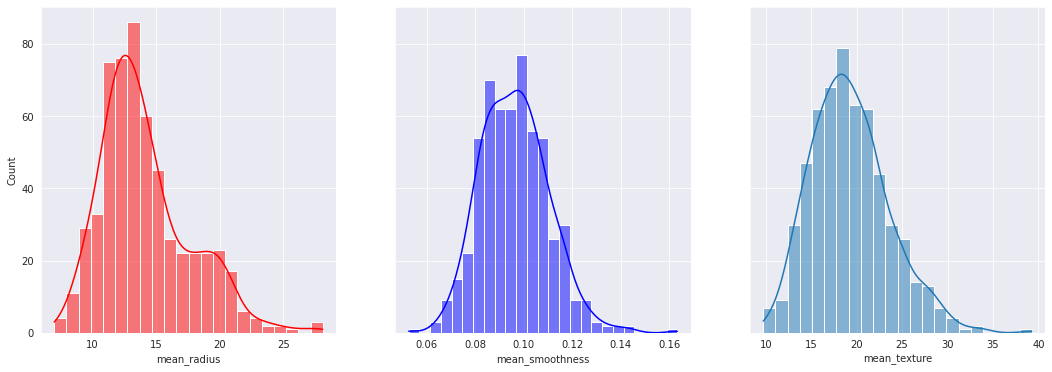

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(data, ax=axes[0], x="mean_radius", kde=True, color='r')
sns.histplot(data, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(data, ax=axes[2], x="mean_texture", kde=True)
plt.show()

Naive Bayes untuk Data Numerik


In [57]:
def prob_prior(df, Y):
  label_kelas = sorted(list(df[Y].unique()))
  prior = []
  for i in label_kelas:
    prior.append(len(df[df[Y]==i])/len(df))
  return prior

In [58]:
def likelihood_gaussian(df, nama_var, nilai_var, Y, label):
  feat = list(df.columns)
  df = df[df[Y]==label]
  mean, std = df[nama_var].mean(), df[nama_var].std()
  p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((nilai_var-mean)**2 / (2 * std**2 )))
  return p_x_given_y

In [59]:
def naive_bayes_gaussian(df, X, Y):
  # mengambil nama kolom
  nama_kolom = list(df.columns)[:-1]

  # menghitung prob prior
  prior = prob_prior(df, Y)

  Y_pred = []
  # lopping pada setiap baris data
  for x in X:
    # menghitung likelihood
    labels = sorted(list(df[Y].unique()))
    likelihood = [1]*len(labels)
    for j in range(len(labels)):
      for i in range(len(nama_kolom)):
        likelihood[j] *= likelihood_gaussian(df, nama_kolom[i], x[i], Y, labels[j])

    # menghitung posterior probability
    post_prob = [1]*len(labels)
    for j in range(len(labels)):
      post_prob[j] = likelihood[j] * prior[j]

    Y_pred.append(np.argmax(post_prob))

  return np.array(Y_pred)

In [60]:
train, test = train_test_split(data, test_size=.2, random_state=41)
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(train, X=X_test, Y="diagnosis")


In [61]:
print(accuracy_score(Y_test, Y_pred))
 

0.9473684210526315
